In [1]:
from funtions import Encrypt, writeCipherArrayInFile,InvertModulo #import all funtions
import os
import time
import math
import matplotlib.pyplot as plt

p:  11 q:  17 pravite key:  7
p:  103 q:  967 pravite key:  55345
p:  43003 q:  78539 pravite key:  1021769999
p:  193153 q:  481043 pravite key:  19541963849
p:  21064753 q:  57897661 pravite key:  805446116538931
[0.0, 0.0, 0.005982875823974609, 0.02094554901123047, 3.2775275707244873]
[8, 17, 32, 37, 51]


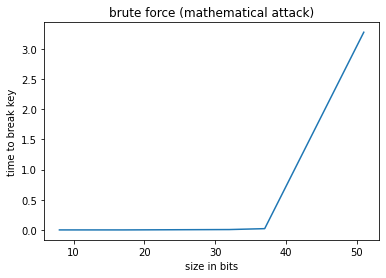

In [2]:
# req 4
def bruteForceAttackForSingleN(n,pu):
    p=0
    q=0
    mx = int(math.sqrt(n))
    for i in range(2,mx+1):
         if (n % i==0):
                p=i
                q=n//i
                break
    phi = (p - 1) * (q - 1)
    # d * e == 1 modulo (p-1)(q-1)
    d = InvertModulo(pu, phi) # private key
    print("p: ",p,"q: ",q,"pravite key: ",d)
                
def bruteForceAttack():
    lines = []
    with open('differentSizesNForAttack.txt') as f:
        lines = f.readlines()
    times=[]
    sizeOfN=[]
    for i in range(0,len(lines),2):
            n = int(lines[i])
            pu = int(lines[i+1])
            start_time = time.time()
            bruteForceAttackForSingleN(n,pu)
            diff_time=(time.time() - start_time)
            times.append(diff_time)
            sizeOfN.append(int(math.log2(n)+1))
    print(times)
    print(sizeOfN)
    plt.plot(sizeOfN, times)
    # naming the x axis
    plt.xlabel('size in bits')
    # naming the y axis
    plt.ylabel('time to break key')

    # giving a title to my graph
    plt.title('brute force (mathematical attack)')

    # function to show the plot
    plt.show()
bruteForceAttack()